In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd

([a 1.00000  2500     0-> 5000  (0    ,   553813)] ,)
([d 1.00000  2500  5000-> 5000  (15624,   409625)] ,)
([a 1.00000  3750  5000-> 2500  (-1   ,   409612)] ,)
([d 1.00000  1250  2500-> 3750  (1    ,   819200)] ,)
([a 1.00000  3438  3750-> 3125  (-3   ,   546133)] ,)
([d 1.00000  1562  3125->    0  (-1   ,   655360)] ,)


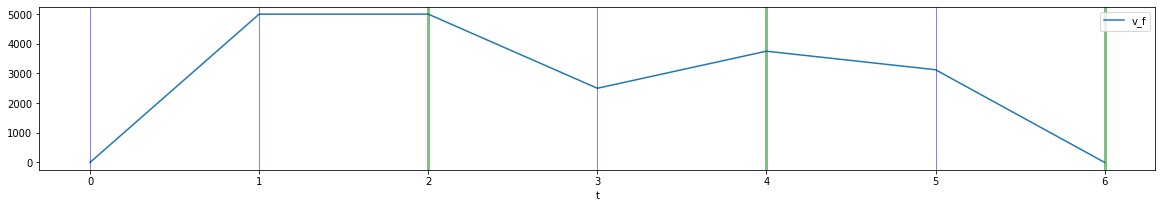

In [21]:
# This move should have an acelleration, then a constant velocity across the three semgments, then decel. It should 
# not have a sawtooth or undulating pattern. 

sl = SegmentList([Joint(5_000, 5_000)])

x = 5000

sl.add_distance_segment([x])
sl.add_distance_segment([x])
sl.add_distance_segment([x])

for e in sl.sub_segments:
    print(e)
    
plot_segment_list(sl.dataframe)

([a 0.10000   250     0-> 4998  (0    ,   175177)] , [a 0.10000   250     0-> 4998  (0    ,   175177)] )
([c 0.10000   500  4998-> 4998  (0    ,   409733)] , [c 0.10000   500  4998-> 4998  (0    ,   409733)] )
([d 0.10000   250  4998-> 4999  (305  ,   409733)] , [d 0.10000   250  4998-> 4999  (305  ,   409733)] )
([a 0.10000   312  4999-> 1250  (0    ,   409666)] , [a 0.10000   437  4999-> 3750  (0    ,   409666)] )
([c 0.10000   125  1250-> 1250  (0    ,  1638400)] , [c 0.10000   375  3750-> 3750  (0    ,   546133)] )
([d 0.10000    62  1250-> 3125  (0    ,  1638400)] , [d 0.10000   188  3750-> 4375  (0    ,   546133)] )
([a 0.10000   242  3125-> 1719  (0    ,   655360)] , [a 0.10000   414  4375-> 3906  (0    ,   468114)] )
([c 0.10000   172  1719-> 1719  (0    ,  1191563)] , [c 0.10000   391  3906-> 3906  (0    ,   524288)] )
([d 0.10000    86  1719-> 3359  (0    ,  1191563)] , [d 0.10000   195  3906-> 4453  (0    ,   524288)] )
([a 0.10000   376  3359-> 4160  (0    ,   609636)] , [a

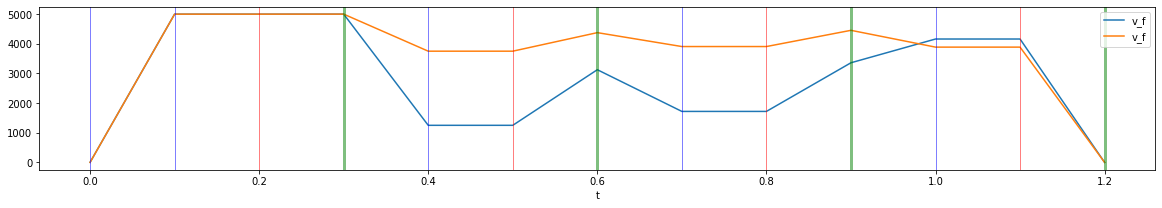

In [30]:
sl = SegmentList([Joint(5000, 50_000, 50_000), Joint(5000, 50_000, 50_000)])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([500, 1000])
sl.add_distance_segment([500, 1000])
sl.add_distance_segment([1000, 1000])

for e in sl.sub_segments:
    print(e)
    
plot_segment_list(sl.dataframe)

In [31]:
sl.positions

[3000, 4000]

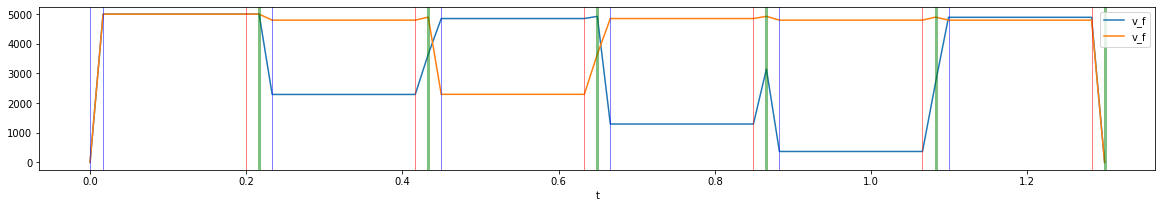

In [5]:
# Much faster accelerations than the last chart. 
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([500, 1000])
sl.add_distance_segment([1000, 500])
sl.add_distance_segment([300, 1000])
sl.add_distance_segment([100, 1000])
sl.add_distance_segment([1000, 1000])

#sl.update()
plot_segment_list(sl.dataframe)

|0.0167 0.1832 0.0167|[4899    -81  :   -879@4797   :  -40    4899] [4899    -81  :   -879@4797   :  -40    4899]
|0.0167 0.1832 0.0167|[4899    81   :    879@4797   :  40        0] [4899    81   :    879@4797   :  40        0]


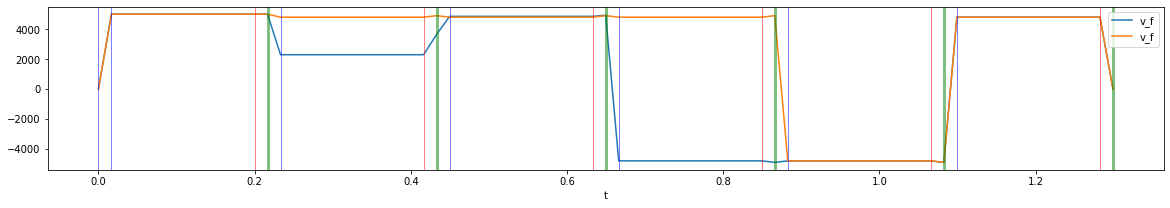

In [6]:
sl = SegmentList([Joint(5000, 300_000, 300_000),Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([1000,1000])
sl.add_distance_segment([500,1000])
sl.add_distance_segment([1000,1000])
sl.add_distance_segment([-1000,1000])
sl.add_distance_segment([-1000,-1000])
sl.add_distance_segment([1000,1000])

plot_segment_list(sl.dataframe)
print(str(sl))

In [7]:
sl.dataframe.head()

,axis,x,v_i,v_f,ss,del_t,n,cn,t
0,0,42.0,0.00,4999.63,a,0.016667,0,71497,0.016667
1,1,42.0,0.00,4999.63,a,0.016667,0,71497,0.016667
2,0,917.0,4999.63,4999.63,c,0.183200,0,409630,0.199867
3,1,917.0,4999.63,4999.63,c,0.183200,0,409630,0.199867
4,0,42.0,4999.63,4999.81,d,0.016667,231,409630,0.216533


array([0.0166667])

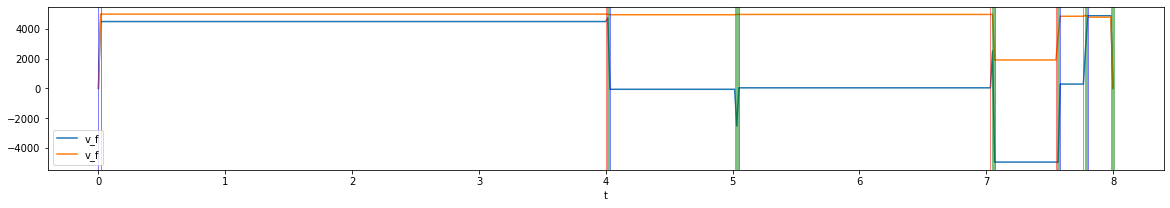

In [8]:
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.add_distance_segment([18000, 20000])
sl.add_distance_segment([-100, 5000])
sl.add_distance_segment([100, 10000])
sl.add_distance_segment([-2500, 1000])
sl.add_distance_segment([100, 1000]) ## ERROR! This velocity should not be negative
sl.add_distance_segment([1000, 1000]) ## ERROR! This velocity should not be negative

df = sl.dataframe

plot_segment_list(sl.dataframe)
df[df.ss != 'c'].del_t.unique()

[1000, 1000]


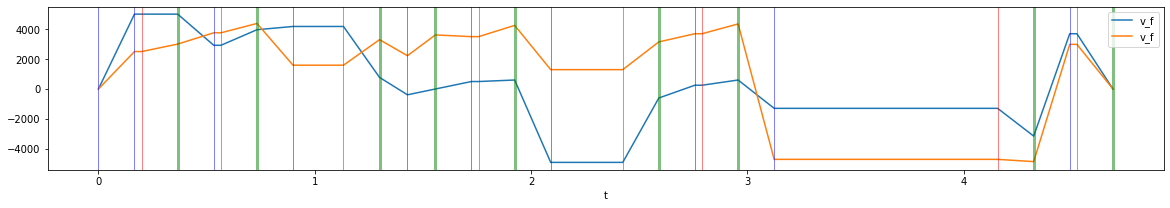

In [9]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.add_distance_segment([1000, 500])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([2000, 1000])
sl.add_distance_segment([-100, 500])
sl.add_distance_segment([100, 1000])
sl.add_distance_segment([-2500, 1000])
sl.add_distance_segment([100, 1000]) 
sl.add_position_segment([0, 0]) 
sl.add_distance_segment([1000, 1000]) ## ERROR! This velocity should not be negative


plot_segment_list(sl.dataframe)

sl.validate()
print(sl.positions)

|0.1667 0.0332 0.1667|[5000    660  :     97@2919   :  243       0] [0        0   :      0@0      :   0        0]
|0.1667 0.0332 0.1667|[0        0   :      0@0      :   0        0] [0       417  :    167@5000   :  417       0]
[2000, 2000]


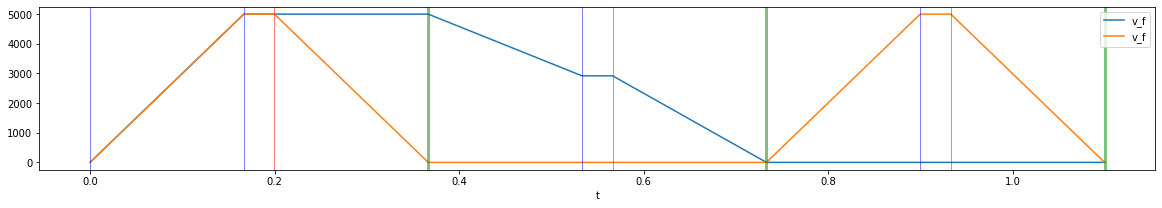

In [10]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.add_distance_segment([1000, 1000])
sl.add_distance_segment([1000, 0])
sl.add_distance_segment([0, 1000])

df = sl.dataframe

plot_segment_list(sl.dataframe)
for s in sl:
    print(s)
    
#sl.validate()
print(sl.positions)

|0.2739 0.0000 0.2739|[0      -2500 :      0@18258  : -2500      0]
|0.2739 0.0000 0.2739|[0      -2500 :      0@18258  : -2500      0]
[0]


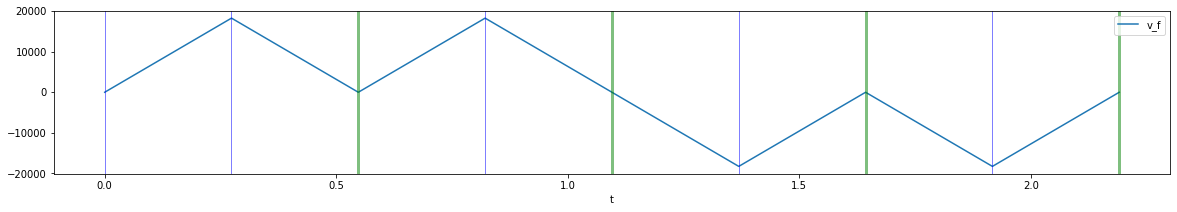

In [11]:
sl = SegmentList([Joint(33333, 66666)])
x = 5000
sl.add_distance_segment([x])
sl.add_distance_segment([x])
sl.add_distance_segment([-x])
sl.add_distance_segment([-x])

df = sl.dataframe

plot_segment_list(sl.dataframe)
for s in sl:
    print(s)

#sl.validate()
print(sl.positions)

In [12]:
14.908532541958522+85.55207900072237

100.4606115426809

In [13]:
sl = SegmentList([Joint(10000, 3000_000, 3000_000), Joint(10000, 3000_000, 3000_000)])

sl.add_distance_segment([5.0,-100.0])
sl.add_distance_segment([5.0,-100.0])
sl.add_distance_segment([-5.0,-100.0])
print(sl)
#sl.update(validate = False)



|0.0033 0.0066 0.0033|[1500     3   :      2@283    :   0     1500] [10000   -31  :    -55@8384   :  -14    9192]
|0.0033 0.0066 0.0033|[1500    -3   :     -2@283    :  -0        0] [9192    -30  :    -56@8538   :  -14       0]


In [14]:
10000 / 2500

4.0

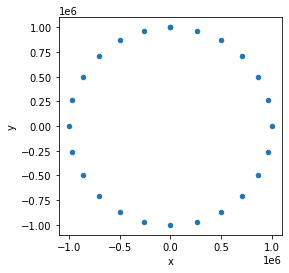

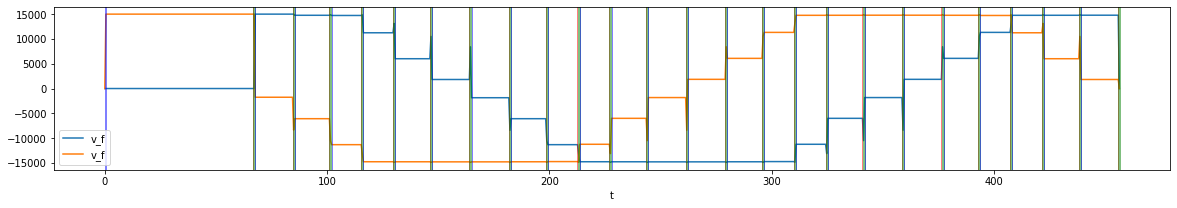

In [15]:
import numpy as np

sl = SegmentList([Joint(15000, 30_000, 30_000), Joint(15000, 30_000, 30_000)])

p = []
lx, ly = None,None
for a in np.linspace(0,2*np.pi, 25):
    x = np.sin(a)*1000000
    y = np.cos(a)*1000000
    
    
    if lx is None:
        lx, ly = x,y
        
    
    #print(f"sl.add_distance_segment([{x-lx},{y-ly}], validate=False)")
    p.append((x,y))
    sl.add_position_segment([x,y])
    lx, ly = x,y
    
df = pd.DataFrame(p, columns=['x','y'])
df.plot.scatter(x='x', y='y', figsize=(4,4))


#print(sl)
plot_segment_list(sl.dataframe)

In [16]:
print(sl)

|0.5000 15.5787 0.5000|[14881  7412  : 230076@14769  : 3692   14884] [13121  4782  :  93616@6009   : 1502   10505]
|0.5000 16.7546 0.5000|[14884  7417  : 247706@14784  : 3696       0] [10505  3082  :  30537@1822   :  456       0]


<AxesSubplot:xlabel='x', ylabel='y'>

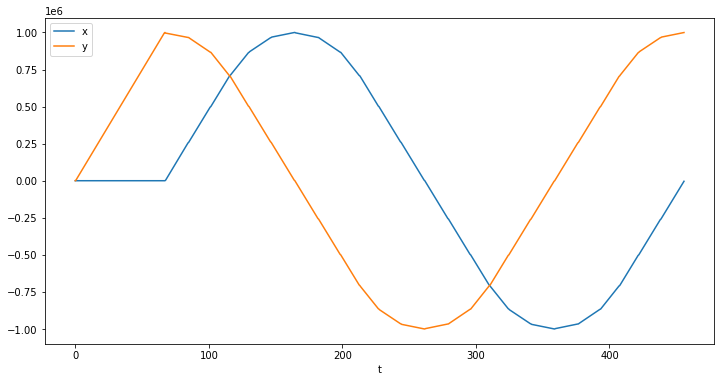

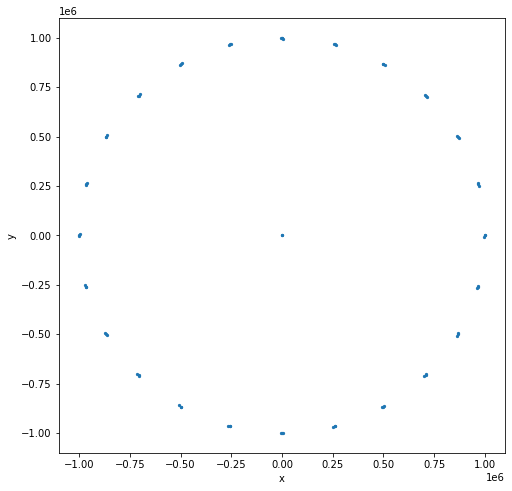

In [17]:
# Get the points from the subsegments. 
def generate_points(sl):
    t = 0
    x = 0
    y = 0

    for e in sl.sub_segments:
        yield(t, x, y)
        t += e[0].t
        x += e[0].x
        y += e[1].x
l = list(generate_points(sl))

df = pd.DataFrame(l, columns = 't x y'.split()).set_index('t')
df.plot(figsize=(12,6))
df.plot.scatter(x='x', y='y', marker='.',figsize = (8, 8))

In [18]:
def sim_df(axis, sl):
    simsegs = []
    slsegs = []
    
    for e in sl.sub_segments:
        s = e[axis]

        t, x, v0, v1 = s.t, s.x, s.v_i, s.v_f
        a = float(v1-v0)/float(t)
        if abs(round(x)) !=0:
            slsegs.append([t, x, v0, v1, a])

            simsegs += list(tj.SimSegment(v0,v1,x=x,t=t))
        
    sl_df = pd.DataFrame(slsegs, columns="t x v0 v1 a".split())
        
    df = pd.DataFrame(simsegs,columns=tj.SimSegment.row_header)
    df['tc'] = df.cn.cumsum()
    df['xn'] = df.dir.cumsum()
    df['delay'] = 1 / df.cn
        
    return sl_df, df

def plot2d(df_0, df_1):
    s = pd.DataFrame({'tc':np.linspace(df_0.tc.min(),df_0.tc.max(), 50000)})
    dfx = pd.concat([df_0[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'x'})
    dfy = pd.concat([df_1[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'y'})

    df = dfx.join(dfy)
    
    df.plot.scatter(x='x', y='y', marker='.', figsize = (8, 8))


sl_df_0, df_0 = sim_df(0,sl)

sl_df_1, df_1 = sim_df(1,sl)

ax = df_0.plot(x='tc', y='xn', figsize = (20, 8) )
ax = df_1.plot(ax=ax,x='tc', y='xn')

plot2d(df_0, df_1)

AssertionError: 